In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('train.csv',index_col=0)
test = pd.read_csv('test.csv',index_col=0)

In [3]:
train.shape

(891, 11)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [6]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
train = train.dropna()

In [8]:
train.Age.unique()

array([38.  , 35.  , 54.  ,  4.  , 58.  , 34.  , 28.  , 19.  , 49.  ,
       65.  , 45.  , 29.  , 25.  , 23.  , 46.  , 71.  , 21.  , 47.  ,
       24.  , 32.5 , 37.  , 36.5 , 22.  , 61.  , 56.  , 50.  ,  1.  ,
        3.  , 44.  ,  2.  , 40.  , 31.  , 32.  , 62.  , 30.  , 52.  ,
       63.  , 36.  ,  0.92, 17.  , 18.  , 16.  , 45.5 , 41.  , 60.  ,
       27.  , 33.  , 14.  , 64.  , 48.  , 55.  , 39.  , 53.  , 42.  ,
       80.  , 15.  , 70.  ,  6.  , 51.  , 57.  , 43.  , 11.  , 26.  ])

In [9]:
train["Age"].fillna(test["Age"].median(),inplace = True)

//anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [10]:
objs=list(train.select_dtypes(include=['object']).columns)

for obj in objs:
    print(obj)
    print(train[obj].unique())

Name
['Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)' 'McCarthy, Mr. Timothy J'
 'Sandstrom, Miss. Marguerite Rut' 'Bonnell, Miss. Elizabeth'
 'Beesley, Mr. Lawrence' 'Sloper, Mr. William Thompson'
 'Fortune, Mr. Charles Alexander'
 'Harper, Mrs. Henry Sleeper (Myna Haxtun)'
 'Ostby, Mr. Engelhart Cornelius' 'Harris, Mr. Henry Birkhardt'
 'Nye, Mrs. (Elizabeth Ramell)' 'Moen, Mr. Sigurd Hansen'
 'Fortune, Miss. Mabel Helen' 'Chaffee, Mr. Herbert Fuller'
 'Goldschmidt, Mr. George B' 'Greenfield, Mr. William Bertram'
 'White, Mr. Richard Frasar' 'Porter, Mr. Walter Chamberlain'
 'Baxter, Mr. Quigg Edmond' 'Webber, Miss. Susan'
 'White, Mr. Percival Wayland' 'Newsom, Miss. Helen Monypeny'
 'Futrelle, Mr. Jacques Heath' 'Giglio, Mr. Victor'
 'Navratil, Mr. Michel ("Louis M Hoffman")'
 'Pears, Mrs. Thomas (Edith Wearne)' 'Van der hoef, Mr. Wyckoff'
 'Smith, Mr. James Clinch' 'Isham, Miss. Ann Elizabeth'
 'Becker, Master. Richard F' 'Navr

NameError: name 'ax1' is not defined

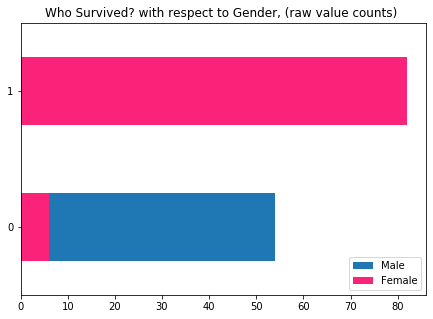

In [11]:
fig = plt.figure(figsize=(16,5)) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

#columns = ['Embarked','Sex','Class']

columns = ['Pclass']

a = 1
for column in columns:
    plt.subplot(1,1,a) #Height, Width
    sns.countplot(x=train[column], hue=train["Survived"])
    a += 1
plt.title("Distribution of Survival, (1 = Survived)")
plt.legend(('3rd Class', '2nd Class','1st Class'),loc='best') 

df_male = train.Survived[train.Sex == 'male'].value_counts().sort_index()
df_female = train.Survived[train.Sex == 'female'].value_counts().sort_index()


# Making Individual Plots
plt.subplot(1,2,1) # Width, Height, Order
df_male.plot(kind='barh',label='Male')
df_female.plot(kind='barh', color='#FA2379',label='Female')
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

plt.subplot(1,2,2)
#adjust graph to display the proportions of survival by gender
(df_male/float(df_male.sum())).plot(kind='barh',label='Male')  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female')
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')


In [ ]:
plt.figure(figsize=(18,8))
alpha_level = 0.65

ax1=plt.subplot(2,2,1)
female_highclass = train.Survived[train.Sex == 'female'][train.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479',alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
#ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=plt.subplot(2,2,2,sharey=ax1)
female_lowclass = train.Survived[train.Sex == 'female'][train.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, lowclass', color='#FA2411',alpha=alpha_level)
ax2.set_xticklabels(["Survived", "Died"], rotation=0)
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax3=plt.subplot(2,2,3,sharey=ax1)
male_highclass = train.Survived[train.Sex == 'male'][train.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', color='#FA2411',alpha=alpha_level)
ax3.set_xticklabels(["Survived", "Died"], rotation=0)
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

In [ ]:
#fe0 = train.groupby('ord_3').size()/len(train)
#fe0

### Feature Encoding

In [ ]:
# One-Hot Encoding

train  = pd.get_dummies(train,prefix=[""],columns=["Sex"])
train  = pd.get_dummies(train,prefix=[""],columns=["Embarked"])

# Ordinal Encoding

Pclass_dict = {1:3,2:2,3:1}
train['class'] = train.Pclass.map(Pclass_dict)

#ord_2_dict = {'Freezing':1,'Cold':2,'Warm':3,'Hot':4,'Boiling Hot':5,'Lava Hot':6}
#train['Temp'] = train.ord_2.map(ord_2_dict)

# Frequency Encoding

#fe0 = train.groupby('ord_3').size()/len(train)
#train['ord_3_1'] = train.ord_3.map(fe0)

#fe1 = train.groupby('ord_4').size()/len(train)
#train['ord_4_1'] = train.ord_4.map(fe1)

#fe2 = train.groupby('month').size()/len(train)
#train['month_1'] = train.month.map(fe2)

#fe3 = train.groupby('day').size()/len(train)
#train['day_1'] = train.day.map(fe3)

#train["bin_3"]=np.where(train['bin_3'] == "T", 1 ,0)
#train["bin_4"]=np.where(train['bin_4'] == "Y", 1 ,0)

In [ ]:
#train['ord_2'].astype(int)

#train['Competence'] = train.Competence.astype(int)
#train['Temp'] = train.Temp.astype(int)
#train['bin_3'] = train.bin_3.astype(int)
#train['bin_4'] = train.bin_4.astype(int)

non_ints=list(train.select_dtypes(include=['uint8']).columns)

for non_int in non_ints:
    train[non_int] = train[non_int].astype(int)


#train['ord_3_1'] = train.ord_3_1.astype(float)
#train['ord_4_1'] = train.ord_4_1.astype(float)

In [ ]:
train.info()

In [ ]:
train.drop(['Pclass','Cabin','Ticket'],axis=1,inplace=True)

#train.drop(['nom_0'],axis=1,inplace=True)

In [ ]:
train.corr().abs()

## Identify Variables

In [ ]:
cols=list(train.select_dtypes(include=['int64','float64']).columns)
cols.remove("Survived")

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

X = train[cols]
y = train[['Survived']]

model = LogisticRegression(solver='lbfgs')

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=100, n_features=len(cols), n_informative=2,
                           n_classes=2,n_clusters_per_class=1, random_state=100)

# Create the RFE object and compute a cross-validated score.
rfecv = RFECV(estimator=model, scoring='accuracy')
rfecv = rfecv.fit(X, y)
##~ZZZA
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
from pandas import Series
import pandas.core.algorithms as algos
import scipy.stats.stats as stats
import re
import traceback
import string


max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)


def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)


final_iv, IV = data_vars(train , train.Survived)

In [ ]:
cols=list(IV[(IV["IV"]>=.1)]["VAR_NAME"])

In [ ]:
IV[(IV["IV"]>=.1)]

<img src='https://miro.medium.com/max/578/1*5S_5aAHWe0_knDGZUK3W8w.png'/>

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = train[cols]
y = train[['Survived']]

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, len(cols))
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

In [ ]:
ranking = list(fit.ranking_)
selected_columns = []

for x in range(len(ranking)):
    if ranking[x] == 1:
        selected_columns.append(cols[x])
        
print(selected_columns)

In [ ]:
X = train[selected_columns]
y = train[['Survived']]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=100)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,np.ravel(y_train))

In [ ]:
y_predict=model.predict(X_test)
y_predict

In [ ]:
round(model.score(X_test,y_test),2)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_score(y_test, y_pred_dt)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_dt))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_rf))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

In [ ]:
ab = AdaBoostClassifier(n_estimators=100, random_state=100)
ab.fit(X_train, y_train)
y_pred_ab = ab.predict(X_test)
accuracy_score(y_test, y_pred_ab)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_ab))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ab))

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100,random_state=100)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
accuracy_score(y_test, y_pred_gb)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_gb))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gb))

In [ ]:
#pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)
accuracy_score(y_test, y_pred_xg.round())

In [ ]:
y_pred_xg.round()

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_xg.round()))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xg.round()))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

unsat_probs = [0 for _ in range(len(y_test))]
sat_probs = rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
sat_probs = sat_probs[:, 1]

# calculate scores
unsat_auc = roc_auc_score(y_test, unsat_probs)
sat_auc = roc_auc_score(y_test, sat_probs)

# summarize scores
print(f'Un-Satisfied: ROC AUC={unsat_auc}')
print(f'Satisfied: ROC AUC={round(sat_auc,2)}')

# calculate roc curves
unsat_fpr, unsat_tpr, _ = roc_curve(y_test, unsat_probs)
sat_fpr, sat_tpr, _ = roc_curve(y_test, sat_probs)

# plot the roc curve for the model
plt.plot(unsat_fpr, unsat_tpr, linestyle='--', label='Not Survived')
plt.plot(sat_fpr, sat_tpr, marker='.', label='Survived')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

In [ ]:
# One-Hot Encoding

test  = pd.get_dummies(test,prefix=[""],columns=["Sex"])
test  = pd.get_dummies(test,prefix=[""],columns=["Embarked"])

# Ordinal Encoding

Pclass_dict = {1:3,2:2,3:1}
test['class'] = test.Pclass.map(Pclass_dict)

In [ ]:
test.isnull().sum()

In [ ]:
test["Fare"].fillna(test["Fare"].median(),inplace = True)

In [ ]:
n_pred = gb.predict(test[selected_columns])


In [ ]:
n_pred

In [ ]:
newtest=test[:]

In [ ]:
newtest.insert(0,"Survived",n_pred)

In [ ]:
newtest[["Survived"]].to_csv("submission_gb_1.csv")

In [ ]:
newtest[["Survived"]]